<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n20.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.096493,35.574255,-5.705654,90.965095,97.288149,-6.323055
1,0.0,1.0,47.263371,93.023369,45.378023,195.664762,150.038314,45.626448
2,0.0,2.0,20.472566,55.121994,-7.202007,78.392553,85.241455,-6.848902
3,0.0,3.0,76.570941,69.980535,-23.192149,133.359327,157.290510,-23.931184
4,0.0,4.0,90.064013,72.270460,-37.968560,134.365912,173.353569,-38.987657
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.598500,49.265669,-20.827124,91.037045,109.306194,-18.269149
119996,999.0,116.0,77.353448,35.992124,-14.233363,109.112208,122.595937,-13.483729
119997,999.0,117.0,90.892604,66.301731,-30.170125,137.024211,164.220299,-27.196088
119998,999.0,118.0,20.377509,31.215644,27.087724,88.680877,59.703076,28.977801


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.096493,35.574255,-5.705654,90.965095,97.288149,-6.323055
1,0.0,1.0,47.263371,93.023369,45.378023,195.664762,150.038314,45.626448
2,0.0,2.0,20.472566,55.121994,-7.202007,78.392553,85.241455,-6.848902
3,0.0,3.0,76.570941,69.980535,-23.192149,133.359327,157.290510,-23.931184
4,0.0,4.0,90.064013,72.270460,-37.968560,134.365912,173.353569,-38.987657
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.598500,49.265669,-20.827124,91.037045,109.306194,-18.269149
119996,999.0,116.0,77.353448,35.992124,-14.233363,109.112208,122.595937,-13.483729
119997,999.0,117.0,90.892604,66.301731,-30.170125,137.024211,164.220299,-27.196088
119998,999.0,118.0,20.377509,31.215644,27.087724,88.680877,59.703076,28.977801


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.096493,35.574255,-5.705654,90.965095,97.288149,-6.323055
1,0.0,1.0,47.263371,93.023369,45.378023,195.664762,150.038314,45.626448
2,0.0,2.0,20.472566,55.121994,-7.202007,78.392553,85.241455,-6.848902
3,0.0,3.0,76.570941,69.980535,-23.192149,133.359327,157.290510,-23.931184
4,0.0,4.0,90.064013,72.270460,-37.968560,134.365912,173.353569,-38.987657
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.598500,49.265669,-20.827124,91.037045,109.306194,-18.269149
119996,999.0,116.0,77.353448,35.992124,-14.233363,109.112208,122.595937,-13.483729
119997,999.0,117.0,90.892604,66.301731,-30.170125,137.024211,164.220299,-27.196088
119998,999.0,118.0,20.377509,31.215644,27.087724,88.680877,59.703076,28.977801


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    51.096493  35.574255  -5.705654   90.965095   97.288149   
      1.0    47.263371  93.023369  45.378023  195.664762  150.038314   
      2.0    20.472566  55.121994  -7.202007   78.392553   85.241455   
      3.0    76.570941  69.980535 -23.192149  133.359327  157.290510   
      4.0    90.064013  72.270460 -37.968560  134.365912  173.353569   
...                ...        ...        ...         ...         ...   
999.0 115.0  52.598500  49.265669 -20.827124   91.037045  109.306194   
      116.0  77.353448  35.992124 -14.233363  109.112208  122.595937   
      117.0  90.892604  66.301731 -30.170125  137.024211  164.220299   
      118.0  20.377509  31.215644  27.087724   88.680877   59.703076   
      119.0  63.487848  66.861091 -16.792070  123.556868  136.582011   

                 e_hat  
rep   index             
0.0   0.0    -6.323055  
      1.0    45.626448  
      2.0    -6.848902  
      3.0   -23.931184  
      4.0   -38.987657  
...                ...  
999.0 115.0 -18.269149  
      116.0 -13.483729  
      117.0 -27.196088  
      118.0  28.977801  
      119.0 -13.025142  

[120000 rows x 6 columns]

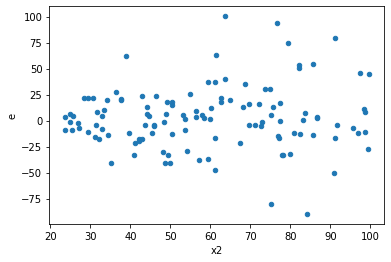

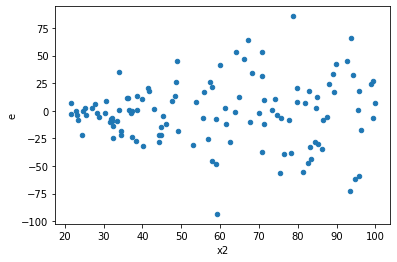

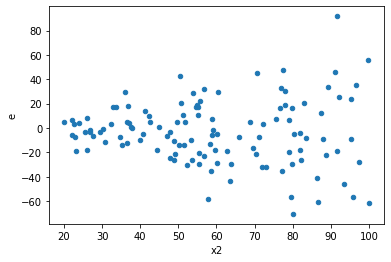

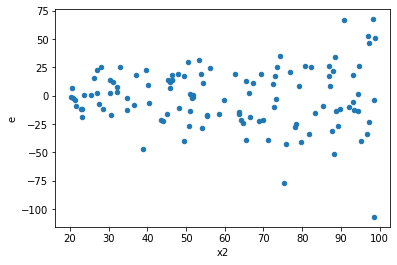

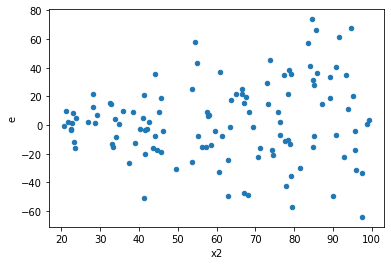

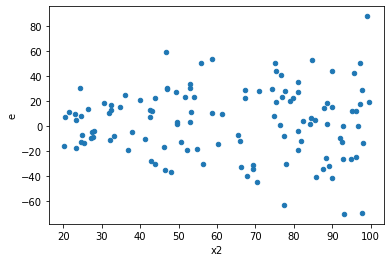

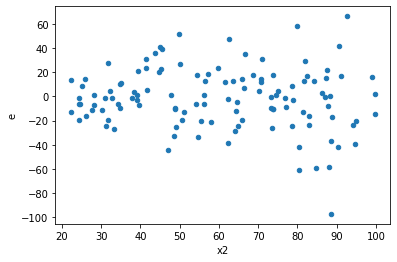

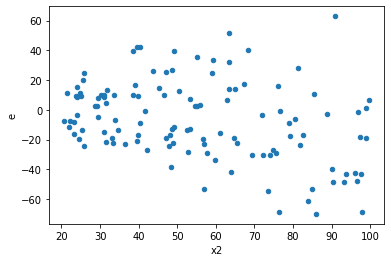

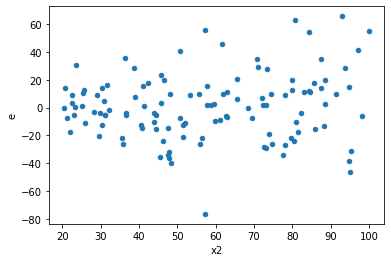

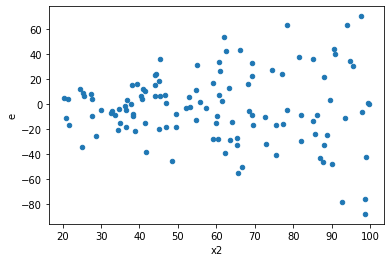

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,31504.36128392297,46840.39658827096,684.8774192157168,1018.2694910493686,1.4867908657514708,0.18240295994602929,0.9087985200269854,0.09120147997301464,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,16866.130152597012,33714.93955587317,366.65500331732636,732.9334686059385,1.9989730454369707,0.020695664388416413,0.9896521678057918,0.010347832194208206,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,15315.635047771146,34745.68085872012,332.9485879950249,755.3408882330461,2.2686412120910777,0.006412773913603065,0.9967936130431985,0.0032063869568015324,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,19014.649416136894,65353.6866849916,413.3619438290629,1420.7323192389479,3.437017704335312,5.2826734578959034e-05,0.9999735866327105,2.6413367289479517e-05,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,28406.98204854496,62514.58896197936,617.543088011847,1359.0128035212904,2.2006768918693154,0.008609241176057214,0.9956953794119714,0.004304620588028607,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,35582.30396574412,59979.4586103825,773.5283470813939,1303.90127413875,1.6856541574184198,0.0798918126154251,0.9600540936922874,0.03994590630771255,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,34393.99407214824,43357.990605256535,747.6955233075705,942.5650131577507,1.260626797641022,0.4352130025609051,0.7823934987195474,0.21760650128045256,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,16273.579166548268,49692.62508643345,353.77346014235366,1080.274458400727,3.0535768793002145,0.00023864221638669747,0.9998806788918067,0.00011932110819334873,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,13833.011922899997,52233.2614481475,300.717650497826,1135.5056836553806,3.775986151047657,1.4782897634013636e-05,0.999992608551183,7.391448817006818e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,31504.36128392297,46840.39658827096,684.8774192157168,1018.2694910493686,1.4867908657514708,0.18240295994602929,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,16866.130152597012,33714.93955587317,366.65500331732636,732.9334686059385,1.9989730454369707,0.020695664388416413,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,15315.635047771146,34745.68085872012,332.9485879950249,755.3408882330461,2.2686412120910777,0.006412773913603065,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,19014.649416136894,65353.6866849916,413.3619438290629,1420.7323192389479,3.437017704335312,5.2826734578959034e-05,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,28406.98204854496,62514.58896197936,617.543088011847,1359.0128035212904,2.2006768918693154,0.008609241176057214,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,35582.30396574412,59979.4586103825,773.5283470813939,1303.90127413875,1.6856541574184198,0.0798918126154251,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,34393.99407214824,43357.990605256535,747.6955233075705,942.5650131577507,1.260626797641022,0.4352130025609051,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,16273.579166548268,49692.62508643345,353.77346014235366,1080.274458400727,3.0535768793002145,0.00023864221638669747,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,13833.011922899997,52233.2614481475,300.717650497826,1135.5056836553806,3.775986151047657,1.4782897634013636e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    762
Reject005=1 : Homoscedasticity      238
Name: Result_test, dtype: int64